# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    #url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | gamba
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | barah
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | brigantine
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | remire-montjoly
Processing Record 13 of Set 1 | ta`u
Processing Record 14 of Set 1 | qamdo
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | vorkuta
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | port shepstone
Processing Record 21 of Set 1 | atafu village
Processing Record 22 of

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,5.43,89,83,3.35,SJ,1722715805
1,gamba,-2.6500,10.0000,22.42,74,71,4.22,GA,1722715806
2,albany,42.6001,-73.9662,28.43,66,86,2.16,US,1722715656
3,thompson,55.7435,-97.8558,21.90,26,66,4.83,CA,1722715808
4,jamestown,42.0970,-79.2353,25.77,83,100,2.06,US,1722715612


In [15]:
# Export the City_Data into a csv
import os

output_data = "output_data"
os.makedirs(output_data,exist_ok=True)
city_data_df.to_csv(os.path.join(output_data, "cities.csv"), index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,5.43,89,83,3.35,SJ,1722715805
1,gamba,-2.6500,10.0000,22.42,74,71,4.22,GA,1722715806
2,albany,42.6001,-73.9662,28.43,66,86,2.16,US,1722715656
3,thompson,55.7435,-97.8558,21.90,26,66,4.83,CA,1722715808
4,jamestown,42.0970,-79.2353,25.77,83,100,2.06,US,1722715612


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

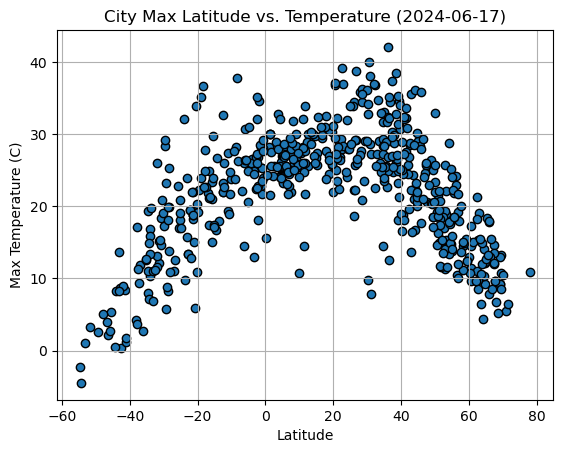

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

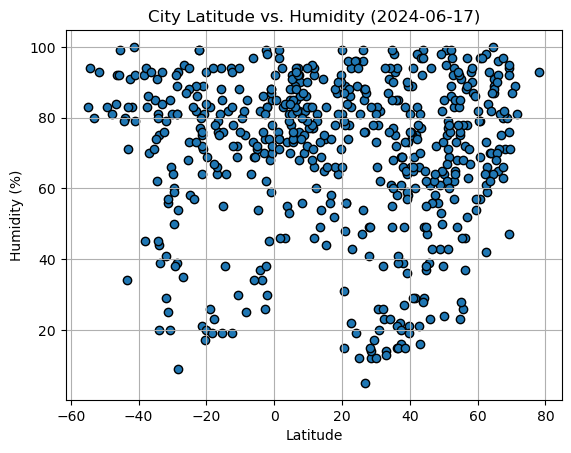

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

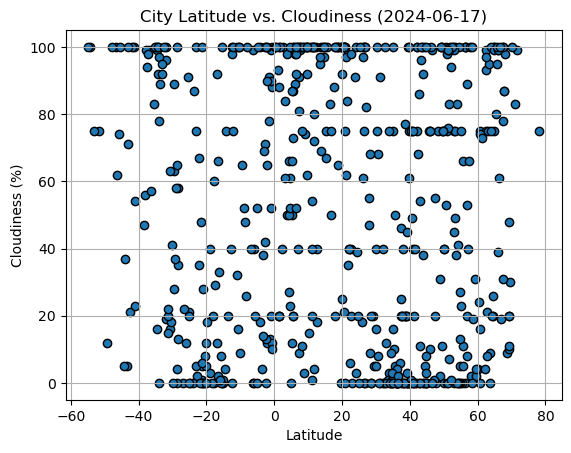

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

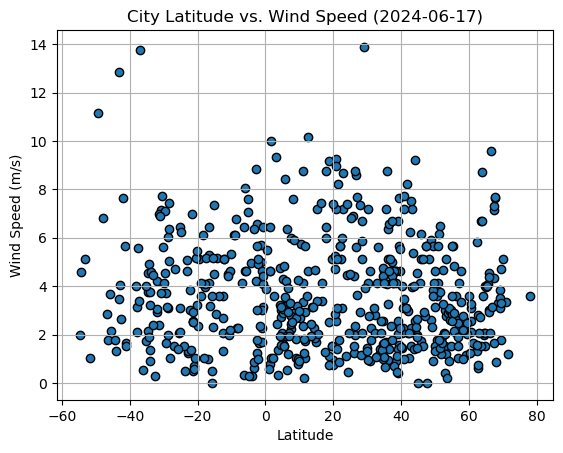

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data)

def plots_linear_regression(x,y,x_label,y_label,title,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regression = slope *np.array(x) + intercept
    line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,color="blue")
    plt.plot(x,regression,color="red")
    plt.annotate(line_eq, (x.min(), y.min()),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r^2 value is: {rvalue**2}")
    plt.savefig(filename)
    plt.show()


In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,5.43,89,83,3.35,SJ,1722715805
2,albany,42.6001,-73.9662,28.43,66,86,2.16,US,1722715656
3,thompson,55.7435,-97.8558,21.90,26,66,4.83,CA,1722715808
4,jamestown,42.0970,-79.2353,25.77,83,100,2.06,US,1722715612
5,barah,13.7000,30.3667,29.78,54,100,3.12,SD,1722715810


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gamba,-2.6500,10.0000,22.42,74,71,4.22,GA,1722715806
6,edinburgh of the seven seas,-37.0676,-12.3116,11.88,70,99,13.77,SH,1722715812
9,blackmans bay,-43.0167,147.3167,8.74,71,71,4.04,AU,1722715815
12,ta`u,-14.2336,-169.5144,26.64,64,75,5.18,AS,1722715818
14,bredasdorp,-34.5322,20.0403,7.98,91,99,2.13,ZA,1722715821


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.37857801610550557


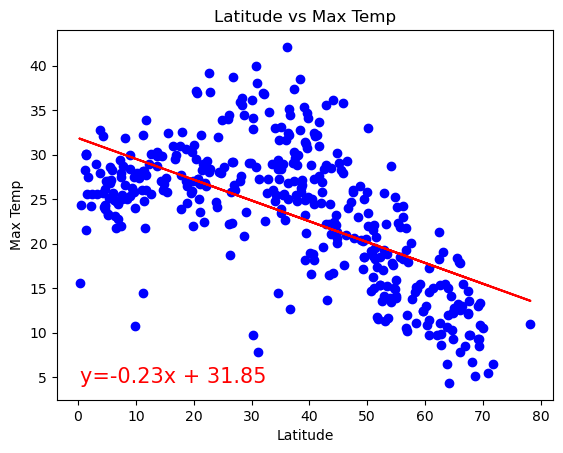

In [68]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature

plots_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude", "Max Temp", 
    "Latitude vs Max Temp", 
    "output_data/Linear_Regression_NLat_v_Temp.png"
)

The r^2 value is: 0.6096647775032071


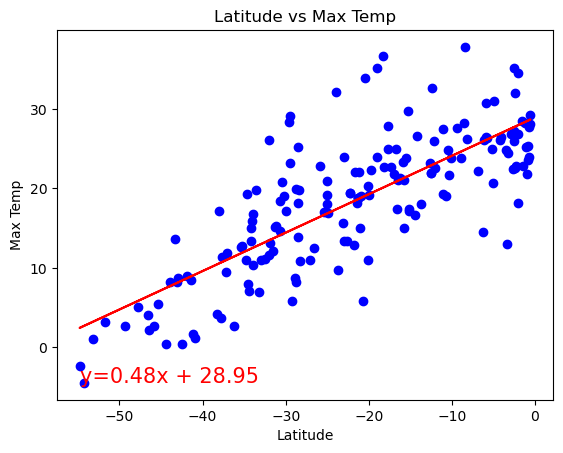

In [67]:
# Linear regression on Southern Hemisphere
plots_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude", "Max Temp", 
    "Latitude vs Max Temp", 
    "output_data/Linear_Regression_SLat_v_Temp.png"
)

**Discussion about the linear relationship: 
There is a fairly positive correlation between latitude and max temp indicated by a r squared value over 0.50 and the positive linear regression line in the southern hemisphere, as opposed to the negative regression line and low r squared value in the northern hemisphere. This also implies that as the latitude increases, the temperature may also increase. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.001996418107959252


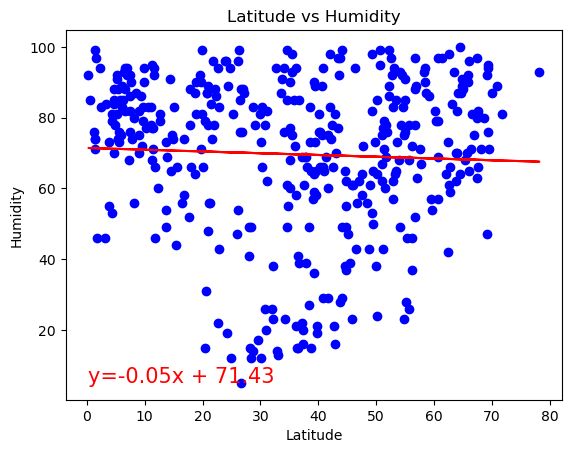

In [66]:
# Northern Hemisphere
plots_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude", "Humidity", 
    "Latitude vs Humidity", 
    "output_data/Linear_Regression_NLat_v_Humidity.png"
)

The r^2 value is: 0.01449454120585486


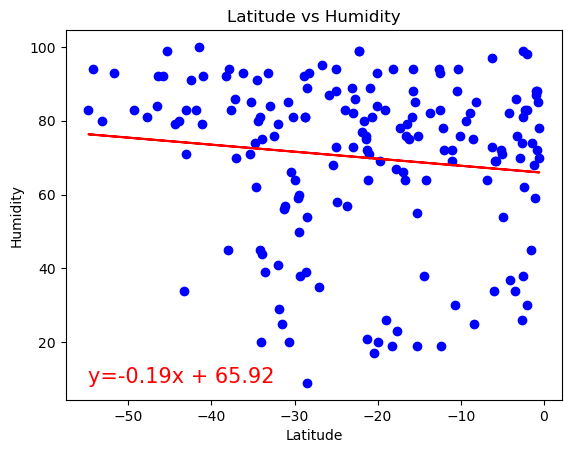

In [65]:
# Southern Hemisphere
plots_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude", "Humidity", 
    "Latitude vs Humidity", 
    "output_data/Linear_Regression_SLat_v_Humidity.png"
)

**Discussion about the linear relationship:
There is reasonably no correlation between latitude and humidity, which is indicated by a neutral regression line and an r squared value so close to zero in both the northern hemisphere and southern hemisphere. This implies that there is no relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.023449090881967713


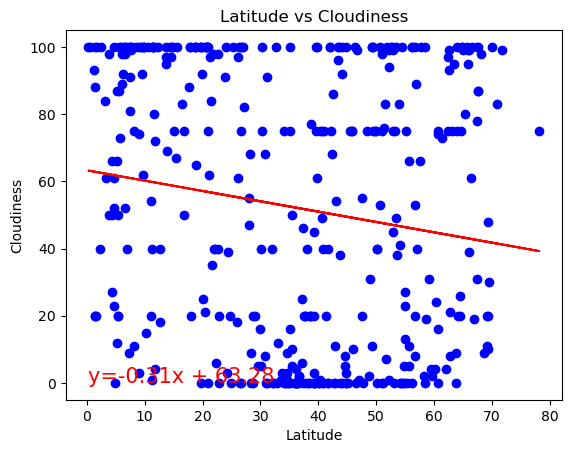

In [64]:
# Northern Hemisphere
plots_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness", 
    "Latitude vs Cloudiness", 
    "output_data/Linear_Regression_NLat_v_Cloudiness.png"
)

The r^2 value is: 0.02602078272729268


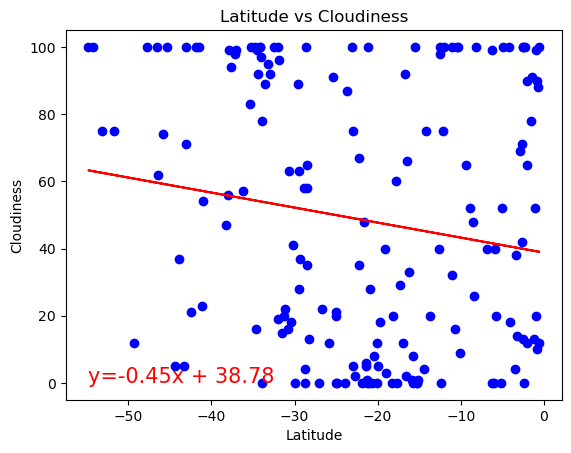

In [63]:
# Southern Hemisphere
plots_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness", 
    "Latitude vs Cloudiness", 
    "output_data/Linear_Regression_SLat_v_Cloudiness.png"
)

**Discussion about the linear relationship:
There is a slight negative correlation between latitude and cloudiness indicated by a negative linear regression line and low r squared values in both hemispheres. This also implies that as the latitude decreases, the cloudiness may increase.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.003929455727350206


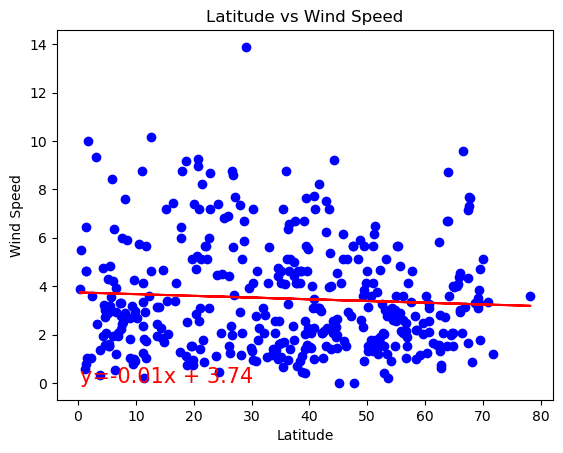

In [62]:
# Northern Hemisphere
plots_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed", 
    "Latitude vs Wind Speed", 
    "output_data/Linear_Regression_NLat_v_WindSpeed.png"
)

The r^2 value is: 0.000514764013364062


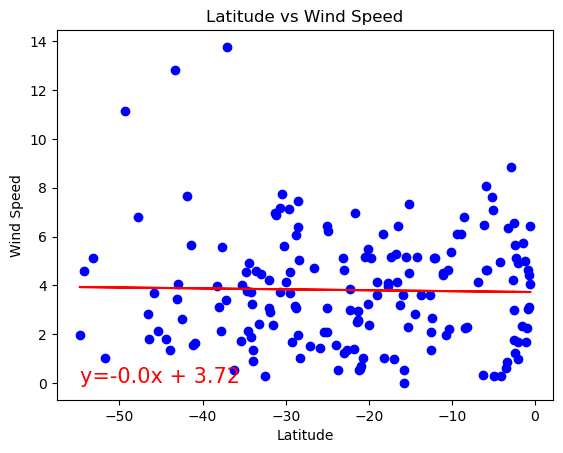

In [61]:
# Southern Hemisphere
plots_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed", 
    "Latitude vs Wind Speed", 
    "output_data/Linear_Regression_SLat_v_WindSpeed.png"
)

**Discussion about the linear relationship:
There is reasonably no correlation between latitude and Wind Speed, which is indicated by a neutral regression line and an r squared value so close to zero in both hemispheres . This implies that there is no relationship between latitude and Wind Speed.
